In [6]:
import pandas as pd
import numpy as np
from helperfunctions import process_text
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns
from sklearn.cluster import KMeans
import nltk




## PCA with imported Chi2 Selected Features

In [62]:
#df=pd.read_csv('abstracts-1.csv',index_col=0)
df=pd.read_csv('trial_level2_cleanttext.csv')

In [30]:
df=df.dropna()

In [31]:
df.head()

,mesh_term,adhesion,bacterial load,bacterial adhesion,pilus,bacterial translocation,bacterial,transformation,tfp,load,...,npop swab,cov positive,bvdv,infectious period,duration viral,cardiovascular,covid treatment,cov represent,covid report,transcription polymerase
0,Hemadsorption,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Virus Physiological Phenomena,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Host-Pathogen Interactions,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Toxin-Antitoxin Systems,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bacterial Physiological Phenomena,0.449939,0.0,0.0,0.0,0.0,0.040441,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df['mesh_term']

0                           Hemadsorption
1           Virus Physiological Phenomena
2              Host-Pathogen Interactions
3                 Toxin-Antitoxin Systems
4       Bacterial Physiological Phenomena
                      ...                
3319               Microbial Interactions
3320                    Nitrogen Fixation
3321                           Microbiota
3322    Bacterial Physiological Phenomena
3323                  Microbial Viability
Name: mesh_term, Length: 3324, dtype: object

In [33]:
# Prepare X and Y
Y = df.loc[:, 'mesh_term']
X = df.drop(['mesh_term'], axis=1)

In [34]:
X

,adhesion,bacterial load,bacterial adhesion,pilus,bacterial translocation,bacterial,transformation,tfp,load,translocation,...,npop swab,cov positive,bvdv,infectious period,duration viral,cardiovascular,covid treatment,cov represent,covid report,transcription polymerase
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.449939,0.0,0.0,0.0,0.0,0.040441,0.0,0.0,0.0,0.089231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3320,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3321,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3322,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
def add_encode_variable(df, column):
    df[column+"_id"] = df[column].factorize(sort=True)[0]
    dic_class_mapping = dict( df[[column+"_id",column]].drop_duplicates().sort_values(column+"_id").values )
    return df, dic_class_mapping

In [35]:
df, dic_y_mapping = add_encode_variable(df, "mesh_term")

print(dic_y_mapping)
df[["mesh_term","mesh_term_id"]].sample(5)

{0: 'Bacterial Physiological Phenomena', 1: 'Biofilms', 2: 'Catabolite Repression', 3: 'Drug Resistance, Microbial', 4: 'Germ-Free Life', 5: 'Hemadsorption', 6: 'Host Microbial Interactions', 7: 'Host-Pathogen Interactions', 8: 'Microbial Interactions', 9: 'Microbial Viability', 10: 'Microbiota', 11: 'Nitrogen Fixation', 12: 'Toxin-Antitoxin Systems', 13: 'Virulence', 14: 'Virus Physiological Phenomena'}


,mesh_term,mesh_term_id
2595,Microbiota,10
2530,Biofilms,1
1608,Host-Pathogen Interactions,7
2690,Virus Physiological Phenomena,14
2576,Host Microbial Interactions,6


In [36]:
df.head()

,mesh_term,adhesion,bacterial load,bacterial adhesion,pilus,bacterial translocation,bacterial,transformation,tfp,load,...,cov positive,bvdv,infectious period,duration viral,cardiovascular,covid treatment,cov represent,covid report,transcription polymerase,mesh_term_id
0,Hemadsorption,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,Virus Physiological Phenomena,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14
2,Host-Pathogen Interactions,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
3,Toxin-Antitoxin Systems,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
4,Bacterial Physiological Phenomena,0.449939,0.0,0.0,0.0,0.0,0.040441,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [42]:
#Y = df.loc[:, 'mesh_term_id']


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X=X)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))




Explained variation per principal component: [0.01504724 0.01067474 0.01004974]


In [25]:
np.random.seed(4)
rndperm = np.random.permutation(df.shape[0])

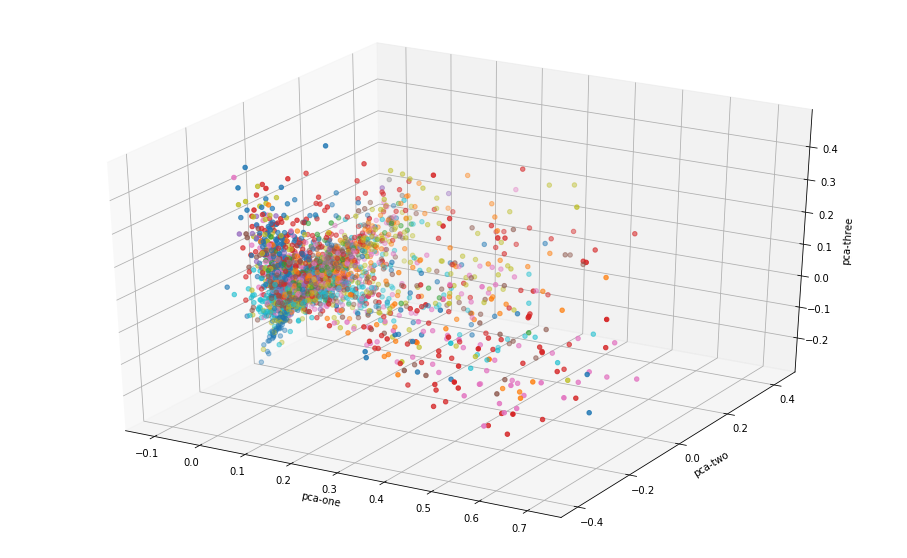

In [47]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["mesh_term_id"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [37]:
pca_1000 = PCA(n_components=1500)
pca_result_1000 = pca_1000.fit_transform(X)
print('Cumulative explained variation for 1500 principal components: {}'.format(np.sum(pca_1000.explained_variance_ratio_)))

Cumulative explained variation for 1500 principal components: 0.9214459321063126


In [46]:
df['pca-one'] = pca_result_1000[:,0]
df['pca-two'] = pca_result_1000[:,1] 
df['pca-three'] = pca_result_1000[:,2]

([<matplotlib.axis.XTick at 0x1890c7390>,
 <a list of 250 Text xticklabel objects>)

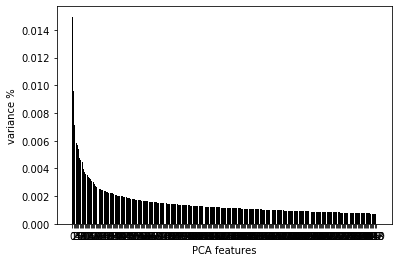

In [43]:
# Plot the explained variances
features = range(pca_1000.n_components_)
plt.bar(features, pca_1000.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

 ##Scree plot showing variance drop-off after the third component.



In [48]:

tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=1000)
tsne_pca_results = tsne.fit_transform(pca_result_1000)
#tsne_pca_results = tsne.fit_transform(tsvd_result)
#tsne_pca_results = tsne.fit_transform(X)

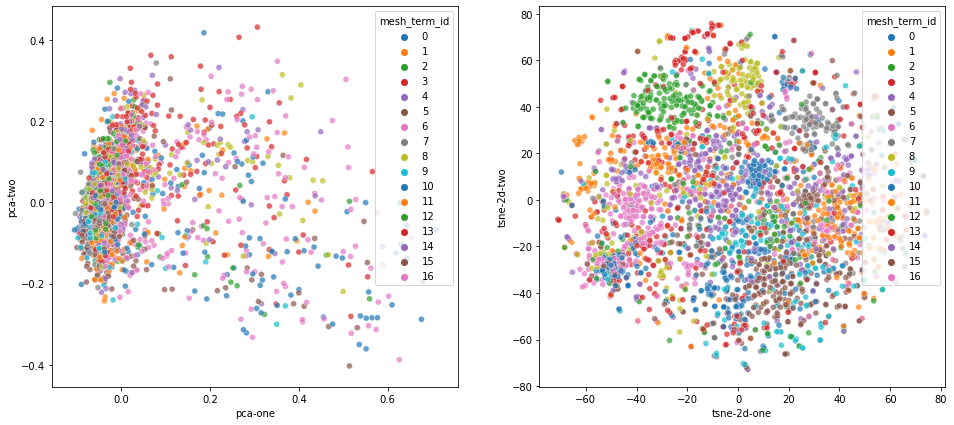

In [51]:
df['tsne-2d-one'] = tsne_pca_results[:,0]
df['tsne-2d-two'] = tsne_pca_results[:,1]


plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="mesh_term_id",
    palette=sns.color_palette('tab10', 17),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.7,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="mesh_term_id",
    palette=sns.color_palette( 'tab10',17),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.7,
    ax=ax2
)
plt.savefig('Level_2_PCA_TSNE')


#"brg_r"  or 'tab10'

# TruncatedSVD

In [129]:
tsvd = TruncatedSVD(n_components=1000)

In [171]:
tsvd_result = tsvd.fit_transform(X=X)

In [172]:
df['tsvd-one'] = tsvd_result[:,0]
df['tsvd-two'] = tsvd_result[:,1] 
df['tsvd-three'] = tsvd_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))



Explained variation per principal component: [0.01849761 0.00908422 0.00740309]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


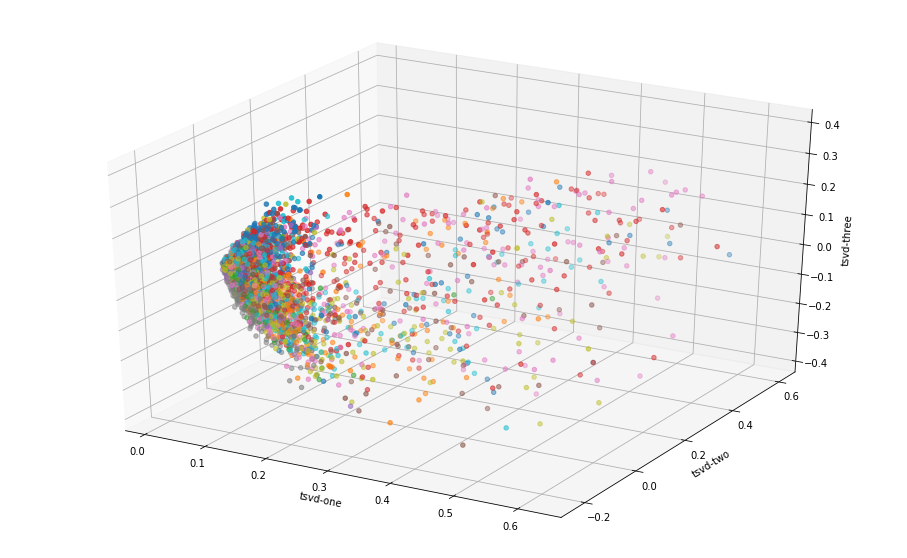

In [173]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["tsvd-one"], 
    ys=df.loc[rndperm,:]["tsvd-two"], 
    zs=df.loc[rndperm,:]["tsvd-three"], 
    c=df.loc[rndperm,:]["mesh_term_id"], 
    cmap='tab10'
)
ax.set_xlabel('tsvd-one')
ax.set_ylabel('tsvd-two')
ax.set_zlabel('tsvd-three')
plt.show()



In [38]:
pca_result_1000 = pd.DataFrame(pca_result_1000)

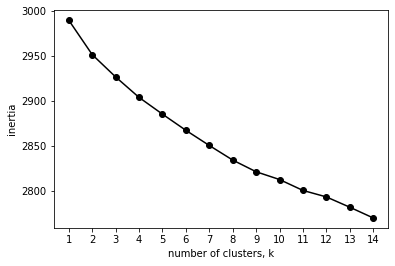

In [61]:
ks = range(1, 15)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(pca_result_1000.iloc[:,:1500])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## Doc2Vec Similarity Clustering


In [4]:
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing

In [100]:
df=pd.read_csv('level_2/topic-modeled-abstracts-2.csv',index_col=0)

In [102]:
df=df.dropna()

In [98]:
import spacy
ner = spacy.load('en_core_sci_lg')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_sci_lg' (0.2.4) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.2). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [103]:
docs = ner.pipe(df.abstract, disable=['tagger', 'parser'])
docs = list(docs)

In [104]:
entities = []
for d in docs:
    doc_ents = []
    for e in d.ents:
        doc_ents.append(e.text)
    entities.append(doc_ents)

In [106]:
df['entities'] = entities

In [108]:
df['entities'] =df['entities'].apply(lambda x: ' '.join(x))

In [109]:
df.head()

,Unnamed: 0.1,pubmed_id,mesh_term,abstract,bow_length,dominant_topic,topic_probability,mesh_term_index,clean_text,entities
0,0,33034170,Bacterial Physiological Phenomena,The adhesion ability of microorganisms to the ...,108.0,3.0,0.343099,0,adhesion ability microorganism surface titaniu...,adhesion microorganisms surface titanium minip...
1,1,33033258,Bacterial Physiological Phenomena,Natural transformation is the process by which...,91.0,5.0,0.500676,0,natural transformation process bacteria take g...,Natural transformation process bacteria geneti...
2,2,33028835,Bacterial Physiological Phenomena,Type IVa pili are ubiquitous and versatile bac...,66.0,5.0,0.689453,0,type iva pili ubiquitous versatile bacterial c...,Type IVa pili ubiquitous bacterial cell filame...
3,3,32970667,Bacterial Physiological Phenomena,"Mycetoma, a chronic infection of the skin and ...",111.0,9.0,0.351834,0,mycetoma chronic infection skin underlie struc...,Mycetoma chronic infection skin structures rel...
5,5,32936818,Bacterial Physiological Phenomena,Subclinical infection with Mycobacterium lepra...,108.0,4.0,0.339141,0,subclinical infection mycobacterium leprae one...,Subclinical infection Mycobacterium leprae lep...


In [82]:
def dtf_partitioning(dtf, y, test_size=0.3, shuffle=True):
    dtf_train, dtf_test = model_selection.train_test_split(dtf, test_size=test_size, shuffle=shuffle) 
    print("X_train shape:", dtf_train.drop(y, axis=1).shape, "| X_test shape:", dtf_test.drop(y, axis=1).shape)
    print("mesh_term:")
    for i in dtf_train["mesh_term"].value_counts(normalize=True).index:
        print(" ", i, " -->  train:", round(dtf_train["mesh_term"].value_counts(normalize=False).loc[i], 2),
                          "| test:", round(dtf_test["mesh_term"].value_counts(normalize=False).loc[i], 2))
    print(dtf_train.shape[1], "features:", dtf_train.drop(y, axis=1).columns.to_list())
    return dtf_train, dtf_test



In [110]:
df, dtf_test = dtf_partitioning(df, y="mesh_term", test_size=0.3, shuffle=True)

X_train shape: (7757, 9) | X_test shape: (3325, 9)
mesh_term:
  Biofilms  -->  train: 698 | test: 278
  Virulence  -->  train: 686 | test: 269
  Microbial Viability  -->  train: 685 | test: 300
  Germ-Free Life  -->  train: 684 | test: 300
  Microbial Interactions  -->  train: 664 | test: 296
  Nitrogen Fixation  -->  train: 659 | test: 306
  Drug Resistance, Microbial  -->  train: 656 | test: 273
  Microbiota  -->  train: 635 | test: 252
  Virus Physiological Phenomena  -->  train: 598 | test: 259
  Bacterial Physiological Phenomena  -->  train: 551 | test: 247
  Host-Pathogen Interactions  -->  train: 497 | test: 199
  Hemadsorption  -->  train: 276 | test: 146
  Host Microbial Interactions  -->  train: 229 | test: 90
  Catabolite Repression  -->  train: 160 | test: 59
  Toxin-Antitoxin Systems  -->  train: 79 | test: 51
10 features: ['Unnamed: 0.1', 'pubmed_id', 'abstract', 'bow_length', 'dominant_topic', 'topic_probability', 'mesh_term_index', 'clean_text', 'entities']


In [111]:
import spacy
#nlp = spacy.load('en_core_web_md')
nlp = spacy.load('en_core_sci_lg')

In [13]:
total_vectors = len(nlp.vocab.vectors)
print('Total word vectors:', total_vectors)

Total word vectors: 600000


In [112]:
corpus_1= df.entities

In [113]:
corpus_1.shape

(7757,)

In [62]:
corpus_1

0        evaluate compare effect contamination haemosta...
1        establish new mechanical model distal humerus ...
2        various manganese oxide mnox prepare via citri...
3        report patient recurrent glioblastoma eloquent...
4        compare stress distribution dental implant dif...
                               ...                        
16383    december case pneumonia detect wuhan china cau...
16384    cytometry technology essential tool immunology...
16385    recent covid pandemic case exceed one million ...
16386    clinical course covid critically ill patient a...
16387    developmental toxicity refer occurrence advers...
Name: clean_text, Length: 16388, dtype: object

In [70]:
# feature engineering with Spacy model
with nlp.disable_pipes(*nlp.pipe_names):
    #train_nlp = [nlp(item) for item in train_corpus]
    train_nlp = list(nlp.pipe(corpus_1))

In [161]:
  train_nlp[0]

evaluate compare effect contamination haemostatic agent like tranexamic acid ta ethamsylate shear bond strength extract human premolar randomly segregate four group consist sample group bond transbond group ii bond transbond blood contamination group iii iv bond transbond contamination tranexamic acid shear bond strength measure data compare one way anova tukey hsd test group highest shear bond strength sb group ii teeth contaminate blood show least sb value anova indicate significant difference four group 05 tukey hsd reveal contamination ta group iii statistically higher sb contamination ethamsylate group iv 05 since tranexamic acid ethamsylate reduce bleed use surgery haemostatic agent may consider bond situation blood contamination anticipate

In [72]:
#doc2vec
train_glove_features = np.array([item.vector for item in train_nlp])

In [73]:
train_glove_features.shape

(14661, 200)

In [114]:
#OR
# The beauty of spaCy is that it automatically provides the averaged embeddings
# for words in each document.  We will now leverage spaCy to get document features for our corpus and use
# k-means clustering to cluster our documents.

with nlp.disable_pipes(*nlp.pipe_names):
    doc_glove_vectors = np.array([nlp(str(doc)).vector for doc in corpus_1]) 

In [179]:
#option
unique_words = list(set([word for sublist in [doc.split() for doc in corpus_1] for word in sublist]))

In [76]:
with nlp.disable_pipes(*nlp.pipe_names):
    word_glove_vectors = np.array([nlp(word).vector for word in unique_words])

In [77]:
pd.DataFrame(word_glove_vectors, index=unique_words)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
homoorientin,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
rosmarinus,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
quantify,-0.218177,-0.221149,0.153235,-0.006736,0.036220,-0.054089,0.065001,-0.110491,-0.064857,-0.066456,...,-0.127421,-0.027103,-0.289684,0.199356,-0.022401,-0.176799,-0.106705,-0.103124,0.450765,-0.031844
177×y11,0.077473,0.117231,0.057694,-0.046331,0.081355,-0.057654,0.013575,0.013354,0.057316,0.080513,...,0.007945,0.085146,-0.057250,0.052050,-0.065304,0.075420,-0.031905,0.001341,-0.033972,-0.051625
fibre,-0.090212,-0.125622,0.058257,0.285865,0.173497,0.219197,0.418838,0.141179,-0.077020,0.057916,...,-0.044834,0.105721,0.018385,-0.069189,0.354739,-0.244462,-0.073692,-0.062431,0.280453,0.193334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p00039,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
veraison,0.339114,0.328847,-0.149857,-0.010102,0.050056,0.316401,-0.174407,-0.124332,-0.548065,-0.336022,...,0.677731,0.051806,-0.234393,0.067028,0.181212,-0.001690,-0.213533,0.149870,-0.221769,-0.079677
344,-0.354631,0.269400,0.402172,0.164419,0.009351,-0.042962,0.203955,0.209019,0.355521,0.269843,...,-0.163914,0.554687,0.275531,-0.152043,-0.162365,-0.272998,0.246526,-0.249132,-0.186752,-0.003465
basso,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [115]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=15, random_state=0)
km.fit_transform(doc_glove_vectors)
y_kmeans = km.predict(doc_glove_vectors)
cluster_labels = km.labels_

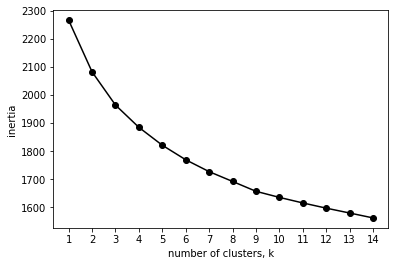

In [16]:
ks = range(1, 15)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(doc_glove_vectors)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [116]:
doc_glove_vectors.shape

(7757, 200)

In [117]:
vec2=pd.DataFrame(doc_glove_vectors)


In [118]:
vec2.to_csv("vec2.csv")

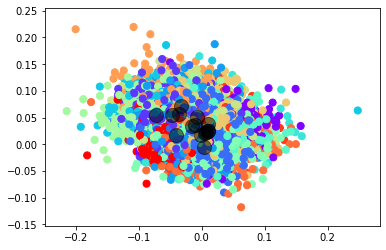

In [34]:
plt.scatter(doc_glove_vectors[:, 0], doc_glove_vectors[:, 1], c=y_kmeans, s=50, cmap='rainbow')

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [119]:
df = pd.DataFrame(np.concatenate([
    corpus_1.values.reshape(-1,1),
    cluster_labels.reshape(-1,1),
    df.mesh_term.values.reshape(-1,1)
], axis=1), columns=['text', 'cluster', 'mesh_term'])
df.head()

,text,cluster,mesh_term
0,Dental caries prevalent chronic oral diseases ...,6,Biofilms
1,biological nitrogen fixation Bacteria Archaea ...,3,Nitrogen Fixation
2,investigate microbiota dentine formation chara...,9,Microbiota
3,Florfenicol synthetic drug chemical structure ...,6,Microbial Viability
4,Research virology host-virus pathosystem mecha...,12,Host-Pathogen Interactions


In [92]:
df.shape

(8796, 3)

In [120]:
df.mesh_term.unique()

array(['Biofilms', 'Nitrogen Fixation', 'Microbiota',
       'Microbial Viability', 'Host-Pathogen Interactions',
       'Bacterial Physiological Phenomena', 'Microbial Interactions',
       'Virulence', 'Host Microbial Interactions', 'Germ-Free Life',
       'Toxin-Antitoxin Systems', 'Virus Physiological Phenomena',
       'Hemadsorption', 'Drug Resistance, Microbial',
       'Catabolite Repression'], dtype=object)

In [121]:
df.groupby("mesh_term").count()

,text,cluster
mesh_term,,
Bacterial Physiological Phenomena,551,551
Biofilms,698,698
Catabolite Repression,160,160
"Drug Resistance, Microbial",656,656
Germ-Free Life,684,684
Hemadsorption,276,276
Host Microbial Interactions,229,229
Host-Pathogen Interactions,497,497
Microbial Interactions,664,664


In [78]:
df.mesh_term

0                   Nitrogen Fixation
1                   Nitrogen Fixation
2         Host Microbial Interactions
3         Host Microbial Interactions
4         Host Microbial Interactions
                    ...              
6644    Virus Physiological Phenomena
6645              Microbial Viability
6646    Virus Physiological Phenomena
6647                   Germ-Free Life
6648                   Germ-Free Life
Name: mesh_term, Length: 6649, dtype: object

In [123]:
df.mesh_term.to_csv('vec_metadata2.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [ ]:
df.to_csv('cluster_results.csv', index=False)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=1000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(doc_glove_vectors)

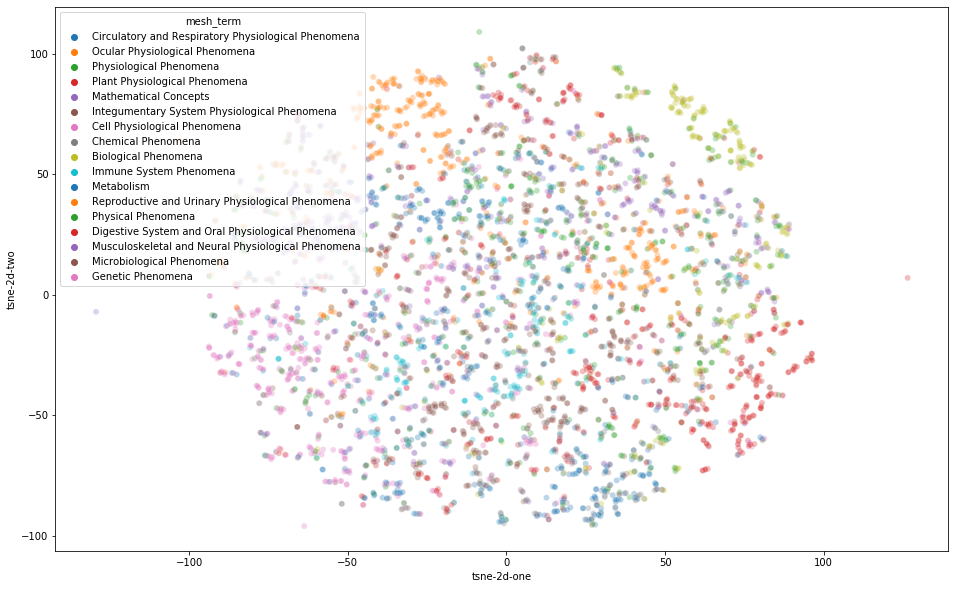

In [137]:
df['tsne-2d-one'] = T[:,0]
df['tsne-2d-two'] = T[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="mesh_term",
    palette=sns.color_palette("tab10", 17),
    data=df,
    legend="full",
    alpha=0.3
    )

In [158]:
labels

array([6, 0, 13, 10, 12, 15, 9, 3, 11, 2, 8, 1, 16, 14, 7, 5, 4],
      dtype=object)

In [157]:
labels = df.cluster.unique()

## Topic Modeling with LDA

In [35]:
def Convert(string): 
    li = list(string.split(" ")) 
    return li



In [36]:
tokenized_corpus2 = [Convert(x) for x in tokenized_corpus] 



In [37]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary


In [38]:
id2word = Dictionary(tokenized_corpus2)

In [39]:
count = 0
for k, v in id2word.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 activate
1 acute
2 alternative
3 approach
4 bear
5 call
6 challenge
7 chikungunya
8 community
9 condition
10 coronavirus


In [40]:
id2word.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [41]:
bow_corpus = [
    id2word.doc2bow(doc)
    for doc in tokenized_corpus2
]
bow_corpus[4310]

In [42]:
from gensim import corpora, models

In [43]:
tfidf= models.TfidfModel(bow_corpus)

In [44]:
corpus_tfidf = tfidf[bow_corpus]

In [45]:
lda_model= models.LdaMulticore(corpus_tfidf, num_topics= 17, id2word=id2word,passes=2)

In [46]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus_tfidf, dictionary=lda_model.id2word)
#vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary=lda_model.id2word)
vis

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
14    -0.033689  0.061817       1        1  30.448917
2      0.060125  0.021919       2        1  20.297340
11     0.083222  0.007100       3        1   6.833311
3      0.016347 -0.018886       4        1   5.190205
0      0.031448  0.023294       5        1   5.018405
4     -0.035161  0.032890       6        1   5.013884
9      0.001052 -0.031922       7        1   3.972728
5     -0.019544 -0.012645       8        1   3.619660
16    -0.037163 -0.035942       9        1   3.534965
6     -0.043299  0.008339      10        1   2.958627
15     0.042910 -0.026232      11        1   2.695724
8     -0.023491 -0.015619      12        1   2.561593
12     0.032720 -0.004778      13        1   1.971489
1     -0.040730 -0.038221      14        1   1.822184
7     -0.001432  0.015506      15        1   1.530195
10     0.000703 -0.012848      16        1   1.452913
13    -0.034021  0.026227      17        1   1.077857, topic_info=     Category        Freq       Term       Total  loglift  logprob
112   Default  173.000000        cov  173.000000  30.0000  30.0000
75    Default  159.000000       sars  159.000000  29.0000  29.0000
6100  Default   57.000000   tetherin   57.000000  28.0000  28.0000
4575  Default  112.000000        bud  112.000000  27.0000  27.0000
4195  Default   46.000000        vpu   46.000000  26.0000  26.0000
...       ...         ...        ...         ...      ...      ...
350   Topic17    1.556552  antiviral  156.719208  -0.0818  -6.4098
267   Topic17    1.541563       bind  141.412918   0.0113  -6.4194
151   Topic17    1.562275        rna  190.880325  -0.2753  -6.4061
125   Topic17    1.513406      human  150.844406  -0.0717  -6.4379
909   Topic17    1.468748  influenza  136.217041   0.0004  -6.4678

[1107 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
5012     10  0.476436  20°c
4817      6  0.722969  229e
4817      8  0.103281  229e
4781      1  0.096222    3a
4781      2  0.096222    3a
...     ...       ...   ...
873      17  0.282532  µgml
5249      8  0.450642    µm
5249     12  0.150214    µm
5293      9  0.247983   α23
5293     14  0.247983   α23

[4250 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 3, 12, 4, 1, 5, 10, 6, 17, 7, 16, 9, 13, 2, 8, 11, 14])

## Topic Coherence 

In [ ]:
labels = [
     "Bacterial Physiological Phenomena", 
     "Biofilms",
     "Catabolite Repression", 
     "Drug Resistance, Microbial", 
     "Germ-Free Life",
     "Hemadsorption",
     "Host Microbial Interactions",
     "Host-Pathogen Interactions",
     "Microbial Interactions",
     "Microbial Viability",
     "Microbiota",
     "Nitrogen Fixation",
     "Toxin-Antitoxin Systems",
     "Virus Physiological Phenomena",
     "Virulence"
 ]




In [ ]:
df.mesh_term.value_counts().index

In [ ]:
def get_dominant_topic(bow, return_prob=True):
    """Returns the topic with highest probability for input `bow`. 
    If `return_prob==True`, also returns the probability for the 
    corresponding topic.
    """
    topics = sorted(
        lda_model.get_document_topics(bow, minimum_probability=0.0),
        key=lambda x: x[1]
        )
    return topics[-1] if return_prob else topics[-1][0]

# we can only reasonably get the topics of non-empty documents
df['bow_length'] = 0.0
df['dominant_topic'] = np.nan
df.loc[~df.abstract.isna(), 'bow_length'] = [len(bow) for bow in bow_corpus]
dominant_topics = [
    get_dominant_topic(bow)
    for bow in bow_corpus
    if len(bow) > 0
    ]
dominant_topics = np.array(dominant_topics)
df.loc[df['bow_length'] > 0, 'dominant_topic'] = dominant_topics[:, 0]
df.loc[df['bow_length'] > 0, 'topic_probability'] = dominant_topics[:, 1]
# it helps to have the mesh terms be indices in the same range as the topics
# labels (mesh terms) are filtered because some labels may have no documents
labels_filtered = [l for l in labels if l in df.mesh_term.value_counts().index]
df['mesh_term_index'] = df.mesh_term.apply(
    labels_filtered.index
)

In [ ]:
df.dominant_topic.value_counts()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
fig.suptitle("dominant_topic", fontsize=12)
df["dominant_topic"].reset_index().groupby("dominant_topic").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_corpus2, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
#lda_model= models.LdaMulticore(corpus_tfidf, num_topics= 15, id2word=id2word,passes=2)

# supporting function
def compute_coherence_values(corpus, dictionary, k):
    
    lda_model = models.LdaMulticore(corpus=corpus_tfidf,
                                           id2word=id2word,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=2,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_corpus2, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [ ]:
import numpy as np

# Topics range
min_topics = 3
max_topics = 15
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

model_results = {
                 'Topics': [],
                 'Coherence': []
                }
        # iterate through number of topics
for k in topics_range:
     # get the coherence score for the given parameters
    cv = compute_coherence_values(corpus=tokenized_corpus2, dictionary=id2word, k=k)
    # Save the model results
    model_results['Topics'].append(k)
    model_results['Coherence'].append(cv)
                    
    
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)

In [ ]:
coherence_results=pd.read_csv('lda_tuning_results.csv')

In [ ]:
ax = plt.gca()

coherence_results.plot(kind='line',x='Topics',y='Coherence',ax=ax,color='red', title='Topic Coherence: Determining optimal number of topics')
#coherence_results.plot(kind='line',x='name',y='Coherence', color='red', ax=ax)

plt.show()

## Compare topics and MeSH labels

In [19]:
dtf=pd.read_csv('cluster_results.csv', index_col=0)
dtf.head()

,cluster,mesh_term
text,,
adhesion ability microorganism surface titanium miniplates screw one factor development purulent inflammatory complication postoperative period one solution problem use ion plasma coat mini plat screw aim study prove decrease adhesion level pathogenic conditionally pathogenic bacterium sample titanium mini plat ion plasma coat compare sample without coat present opinion microbial adhesion important stage development microbial colonization abiotic surface basis study strain aerobic facultative anaerobic pathogen well non spore form non clostridial obligate anaerobic pathogen use research experiment standard method determine residual adhesion apply data obtain process biostat 90 software package data receive method variational parametric nonparametric statistic use mann whitney test take account average value error number observation significance difference 005 result difference index residual adhesion strain aerobic facultative anaerobic pathogen sample without protective coat statistically reliable however adhesion individual specie vary difference index residual adhesion obtain among strain obligate anaerobic pathogen low level adhesion observe case use protective coat promise way development since microorganism dangerous may lead development purulent inflammatory complication rejection implant decrease level adhesion factor reduce microbial load postoperative period,5,Bacterial Physiological Phenomena
natural transformation process bacteria take genetic material environment integrate genome homologous recombination represent one mode horizontal gene transfer contribute spread trait like antibiotic resistance vibrio cholerae type iva pilus t4ap think facilitate natural transformation extend cell surface bind exogenous dna retract thread dna outer membrane secretin pilq use functional tag allele vcpilq purify native v cholerae cell determine cryoem structure vcpilq secretin amphipol 27 use bioinformatics examine domain architecture gene neighborhood t4ap secretin proteobacteria comparison vcpilq structure highlight difference architecture t4ap secretin type ii type iii secretion system secretin base cryoem structure design series mutant reversibly regulate vcpilq gate dynamic experiment support idea vcpilq potential druggable target provide insight channel dna likely traverse promote spread antibiotic resistance via horizontal gene transfer natural transformation,7,Bacterial Physiological Phenomena
type iva pili ubiquitous versatile bacterial cell surface filament undergo cycle extension adhesion retraction power cell envelope span type iva pilus machine t4apm overall architecture t4apm location conserve core protein within architecture elucidate use genetics cell biology proteomics cryo electron tomography demonstrate pily1 protein four minor pilins widely conserve t4ap system essential pilus extension myxococcus xanthus form complex integral part t4apm moreover protein part extend pilus data support model whereby pily1minor pilin complex function prim complex t4apm pilus extension tip complex extend pilus adhesion cork terminate retraction maintain prim complex next round extension,7,Bacterial Physiological Phenomena
mycetoma chronic infection skin underlie structure affect close relationship land often resource poor area world whether cause one variety fungus bacteria mycetoma cause significant disability mortality acknowledge neglect tropical disease ntd world health organization mycetoma susceptible misunderstand misdiagnosed mismanage effort shift balance favor recognition effective treatment sound epidemiological understand require paper literature review case report series paper total present three map identify 19494 case date case contract country first map show mycetoma ever report second show many case report third show ratio eumycetoma fungal actinomycetoma bacterial case find mexico india sudan mycetoma study rigorously identify emergence new geographical locus include unite state venezue

In [3]:
dtf.mesh_term.nunique()


15

In [4]:
from matplotlib import cm
from sklearn.metrics import confusion_matrix, adjusted_rand_score, normalized_mutual_info_score, adjusted_mutual_info_score, mutual_info_score

In [21]:
dtf['mesh_term_index']

text
adhesion ability microorganism surface titanium miniplates screw one factor development purulent inflammatory complication postoperative period one solution problem use ion plasma coat mini plat screw aim study prove decrease adhesion level pathogenic conditionally pathogenic bacterium sample titanium mini plat ion plasma coat compare sample without coat present opinion microbial adhesion important stage development microbial colonization abiotic surface basis study strain aerobic facultative anaerobic pathogen well non spore form non clostridial obligate anaerobic pathogen use research experiment standard method determine residual adhesion apply data obtain process biostat 90 software package data receive method variational parametric nonparametric statistic use mann whitney test take account average value error number observation significance difference 005 result difference index residual adhesion strain aerobic facultative anaerobic pathogen sample without protective coat stat

In [22]:
dtf['mesh_term_index'] = dtf['mesh_term'].factorize()[0]
#df2['ilabel'] = df2['label'].factorize()[0]    
from io import StringIO
ilabel_id_df = dtf[['mesh_term', 'mesh_term_index']].drop_duplicates().sort_values('mesh_term_index')
ilabel_to_id = dict(ilabel_id_df.values)
id_to_label = dict(ilabel_id_df[['mesh_term', 'mesh_term_index']].values)

In [40]:
 dtf['mesh_term'].factorize()[0]

array([ 0,  0,  0, ..., 14, 14, 14])

In [31]:
id_to_label

{'Bacterial Physiological Phenomena': 0,
 'Biofilms': 1,
 'Catabolite Repression': 2,
 'Drug Resistance, Microbial': 3,
 'Germ-Free Life': 4,
 'Hemadsorption': 5,
 'Host Microbial Interactions': 6,
 'Host-Pathogen Interactions': 7,
 'Microbial Interactions': 8,
 'Microbial Viability': 9,
 'Microbiota': 10,
 'Nitrogen Fixation': 11,
 'Toxin-Antitoxin Systems': 12,
 'Virus Physiological Phenomena': 13,
 'Virulence': 14}

In [43]:
dtf.mesh_term_index[0]

0

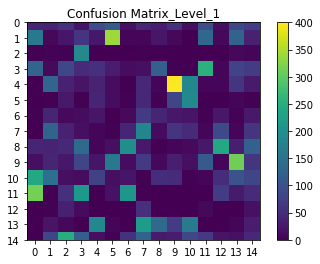

In [7]:

# Plot the confusion matrix of abstracts with computed topics
# against the MeSH terms
conf_mat = confusion_matrix(
    dtf.mesh_term_index[~dtf.cluster.isna()],
    dtf.cluster[~dtf.cluster.isna()]
    )
plt.imshow(conf_mat)
plt.xticks(range(dtf.mesh_term.nunique()))
plt.yticks(range(dtf.mesh_term_index.nunique()))
plt.title('Confusion Matrix_Level_1')
plt.colorbar()
plt.show()

In [13]:
# parameters

USE_TOPIC_PRIOR = True
USE_WORD_PRIOR = False  # only implemented for topic-independent prior

In [14]:
alpha = 'symmetric'
if USE_TOPIC_PRIOR:
    alpha = dtf.mesh_term.value_counts().values.copy()
    alpha = alpha / alpha.sum()

eta = None
if USE_WORD_PRIOR:
    from gensim.matutils import corpus2dense
    eta = corpus2dense(bow_corpus, len(id2word)).sum(axis=0)
    eta = eta / eta.sum()

In [8]:
NUM_RANDOM_ARRANGEMENTS = 10000

In [45]:
len(mesh_labels)

11082

In [44]:

np.random.choice(
    a=dtf.mesh_term.nunique(),
    size=(len(mesh_labels), 100)
    )

array([[12,  9,  5, ...,  2,  0, 12],
       [ 7,  7,  6, ...,  6,  4,  5],
       [11,  7,  0, ..., 12,  6, 11],
       ...,
       [ 1,  8,  5, ...,  9, 11,  4],
       [ 0, 10,  8, ...,  0,  5, 14],
       [ 3,  5, 10, ..., 13,  0, 11]])

In [15]:
scores = [
      adjusted_mutual_info_score
    ]

mesh_labels = dtf.mesh_term_index[~dtf.cluster.isna()]
clusters = dtf.cluster[~dtf.cluster.isna()]
num_topics_or_labels = dtf.mesh_term.nunique()

# Use the same bias in the topic model and mesh terms
# in the random sampling
random_arrangements = np.random.choice(
    a=dtf.mesh_term.nunique(), 
    size=(len(mesh_labels), NUM_RANDOM_ARRANGEMENTS),
    p=alpha
    ) if USE_TOPIC_PRIOR else np.random.choice(
    a=dtf.mesh_term.nunique(),
    size=(len(mesh_labels), NUM_RANDOM_ARRANGEMENTS)
    )



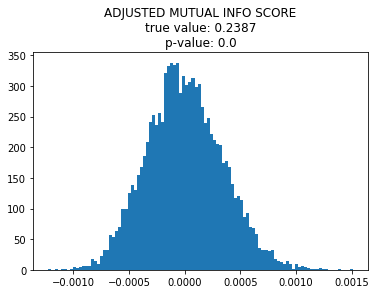

In [33]:
plt.subplot()
for i, score in enumerate(scores):
    random_scores = []
    true_score = score(mesh_labels, clusters)
    for sample_idx in range(NUM_RANDOM_ARRANGEMENTS):
        random_score = score(random_arrangements[:, sample_idx], clusters)
        random_scores.append(random_score)
    # estimate p-value as probability that a random arrangement has a higher score
    p_val = (np.array(random_scores) > true_score).astype(int).sum() / NUM_RANDOM_ARRANGEMENTS
    plt.hist(random_scores, bins=int(np.sqrt(NUM_RANDOM_ARRANGEMENTS)))
    plt.title(
        score.__name__.replace('_', ' ').upper() \
        + '\n' + f'true value: {true_score:.4f}'\
        + '\n' + f'p-value: {p_val}'
    )

